# Building a Decision Tree Classifier

# Loading the dataset

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("Data/decision-trees/self-made-car-dataset.csv")
df.head()

,price (in lakhs),mileage (km/pl),engine_power (horse_power),type,petrol,insurance_provideed,manual,buy
0,4.2,24,120,sedan,no,no,yes,no
1,6.8,25,160,sedan,yes,no,yes,no
2,8.5,26,182,SUV,yes,yes,yes,yes
3,4.7,22,125,sedan,no,no,yes,no
4,12.6,16,190,SUV,yes,yes,no,no


# Work with X Predictor Variables

In [4]:
X_features=list(df.columns)
X_features.remove('buy')
X_features

['price (in lakhs)',
 'mileage (km/pl)',
 'engine_power (horse_power)',
 'type',
 'petrol',
 'insurance_provideed',
 'manual']

# Encode the categorical variables

In [5]:
encoded_df=pd.get_dummies(df[X_features])
encoded_df.head()

,price (in lakhs),mileage (km/pl),engine_power (horse_power),type_SUV,type_sedan,petrol_no,petrol_yes,insurance_provideed_no,insurance_provideed_yes,manual_no,manual_yes
0,4.2,24,120,0,1,1,0,1,0,0,1
1,6.8,25,160,0,1,0,1,1,0,0,1
2,8.5,26,182,1,0,0,1,0,1,0,1
3,4.7,22,125,0,1,1,0,1,0,0,1
4,12.6,16,190,1,0,0,1,0,1,1,0


# Set X and Y

In [7]:
X=encoded_df
Y=df.buy.map(lambda x: int(x=='yes'))

# Split the dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=25)

# Build the Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion='gini',max_depth=7).fit(X_train, Y_train)

In [18]:
clf_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7)

# Accuracy Score

In [19]:
clf_tree.score(X_test, Y_test)

1.0

# Visualising The Tree

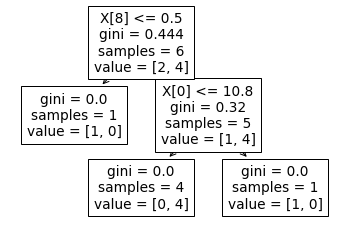

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf_tree);

In [24]:
# For ODT File
!pip install graphviz
!pip install pydotplus
!pip install IPython
from sklearn.tree import export_graphviz

#Export the tree into odt file; odt is Text File
export_graphviz(clf_tree, out_file='Dumps/decision_tree/dtree.odt', feature_names=X_train.columns, filled=True)